# Predicting price of bulldozers

This notebook looks into develop a ML model that is able to predict the price of bulldozers based on its characteristics and previous sales. To build a model it will be used Python-based ML and Data Science libraries.

Since the goal is to predict a price, this problem is a **regression problem**.

**Steps used to build the model:**
1. Probelm definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Feature Importance

## **1. Probelm definition**
> How well a model can predict the price of a bulldozer based on its characteristics and previous sales?

## **2. Data**
The data is downloaded from Kaggle - Blue Book for Bulldozers: https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

The data for this competition is split into three parts:
* **Train.csv** - training set, which contains data through the end of 2011.
* **Valid.csv** - validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* **Test.csv** - test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## **3. Evaluation**
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted prices. Having this evaluation metric, the goal is to minimize that error.
> More about the evaluation of this project: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

## **4. Features**
The data downloaded provides a data dictionary, which has informations about each column.
https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit#gid=1021421956

#### Import EDA libraries
* For data analysis and manipulation are going to be used Pandas, NumPy, and Matplotlib.
* Is going to be used a regression model/algorithm from sklearn's modules
* Also, the evaluatoin metrics are imported from sklearn's modules.

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Helps plots to be shown in Jupyter Notebook
%matplotlib inline

#### Import the training and validation datasets

In [2]:
df = pd.read_csv('data/TrainAndValid.csv',
                 low_memory=False)

# Visualize the data
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,11/16/2006 0:00,3/26/2004 0:00,2/26/2004 0:00,5/19/2011 0:00,7/23/2009 0:00


This dataset has time series data. In this case, the column is 'saledate' and the data needs to be reimported using `parse_dates` parameter on that column.

**Parsing dates** - having datetime data, the column that has it needs to be parsed through `parse_dates` parameter.

When using this parameter: 
* the dtype of the column will be change from object to datetime
* the format of the date will be change to YYYY-MM-DD

In [3]:
# Current dtype of the `saledate` column
df['saledate'].dtype

dtype('O')

In [4]:
# Current format of the `saledate` column
df['saledate'].head(10)

0    11/16/2006 0:00
1     3/26/2004 0:00
2     2/26/2004 0:00
3     5/19/2011 0:00
4     7/23/2009 0:00
5    12/18/2008 0:00
6     8/26/2004 0:00
7    11/17/2005 0:00
8     8/27/2009 0:00
9      8/9/2007 0:00
Name: saledate, dtype: object

In [5]:
# Reimport the data
df = pd.read_csv('data/TrainAndValid.csv',
                 low_memory=False,
                 parse_dates=['saledate'])

# New dtype of the `saledate` column
df['saledate'].dtype

dtype('<M8[ns]')

In [6]:
# New `saledate` format
df['saledate'].head(10)

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

#### Plot the data

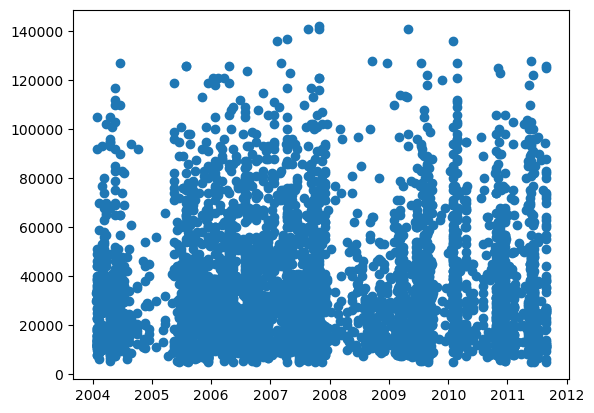

In [8]:
# Compare `saledate` vs. `salePrice` (first 5000 samples)
plt.scatter(df['saledate'][:5000], df['SalePrice'][:5000]);

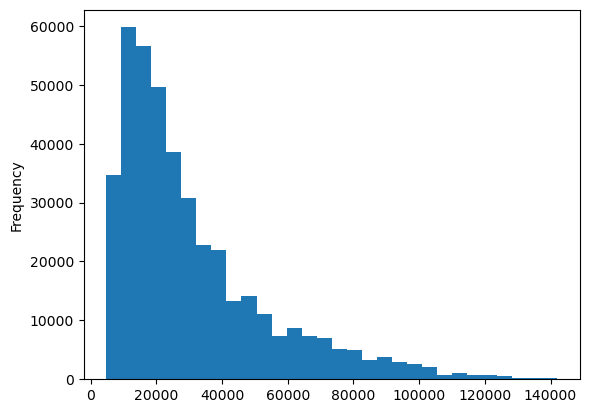

In [9]:
df['SalePrice'].plot.hist(bins=30);

According to the histogram, most of the prices are around 20k.

### **Explore and manipulate the data**

In [10]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


If the dataset has to many columns, jupyter wouldn't display all of them. In this case, the transpose can be used to visualize all columns.

In [11]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [12]:
# Sort data by `saledate` in ascending order
df.sort_values(by=['saledate'], ascending=True, inplace=True)
df['saledate'].head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [13]:
# Make a copy of the dataframe to manipulate it, so that the original data wouldn't be change in any way
df_copy = df.copy()

#### Add datetime attributes from `saledate` column

In [14]:
df_copy['saleYear'] = df_copy['saledate'].dt.year
df_copy['saleMonth'] = df_copy['saledate'].dt.month
df_copy['saleDay'] = df_copy['saledate'].dt.day
df_copy['saleDayOfYear'] = df_copy['saledate'].dt.dayofyear

All details of the sale date were added in separated columns. In this case, `saledate` column can be removed from the dataframe.

In [15]:
# Remove `saledate` column
df_copy.drop('saledate', axis=1, inplace=True)

In [16]:
# Check the new columns added in the dataframe
df_copy.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


### **Convert data to numerical**
At some point, the model will not be able to be fitted. One reason for this problem might be that the data isn't numerical. A method to change the dtype is by converting into Pandas categories.

**Category** Pandas dtype creates a number code for each value in a column. The category is accessed through `cat`.

To verify which columns are not numerical, it will be used `pandas.api.types`: https://pandas.pydata.org/pandas-docs/version/1.4/reference/general_utility_functions.html#dtype-introspection

In [17]:
df_copy.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                 object
Blade_Extension             

In [19]:
# Print out all column that are not numerical
for label, value in df_copy.items():
    if not pd.api.types.is_numeric_dtype(value):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


It seems most of the columns are not numerical dtype. So, all of them will be converted into Pandas categories.

In [21]:
# Convert into Pandas category dtype
for label, value in df_copy.items():
    if not pd.api.types.is_numeric_dtype(value):
        df_copy[label] = value.astype('category')

In [22]:
# Check the converted dtypes
df_copy.dtypes

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                   category
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
fiModelSeries               category
fiModelDescriptor           category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Drive_System                category
Enclosure                   category
Forks                       category
Pad_Type                    category
Ride_Control                category
Stick                       category
Transmission                category
Turbocharged                category
B

### **Fill missing data**
1. Fill numerical values
2. Fill categorical values

In [23]:
# Check missing data
df_copy.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

#### 1. Fill numerical values

In [24]:
# Search which columns are numerical
for label, value in df_copy.items():
    if pd.api.types.is_numeric_dtype(value):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfYear


In [25]:
# Search which numeric columns have missing values (NaN values)
for label, value in df_copy.items():
    if pd.api.types.is_numeric_dtype(value):
        if pd.isna(value).sum()!=0:
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [28]:
# Fill numeric values with the median
for label, value in df_copy.items():
    if pd.api.types.is_numeric_dtype(value) and pd.isna(value).sum()!=0:
        
        # Add a new column which tells if it was a missing data in the beginning (True/False)
        df_copy[label+'_is_missing'] = pd.isna(value)

        # Fill missing values
        df_copy[label] = value.fillna(df_copy[label].median())

In [29]:
# Check if it's still missing data in the numeric columns
for label, value in df_copy.items():
    if pd.api.types.is_numeric_dtype(value):
        if pd.isna(value).sum()!=0:
            print(label)

In [30]:
# Check how many missing data were in `auctioneerID` column (True - value was missing)
df_copy['auctioneerID_is_missing'].value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [31]:
# Check how many missing data were in `MachineHoursCurrentMeter` column (True - value was missing)
df_copy['MachineHoursCurrentMeter_is_missing'].value_counts()

MachineHoursCurrentMeter_is_missing
True     265194
False    147504
Name: count, dtype: int64

#### 2. Fill categorical values

In [32]:
# Search which columns are NOT numerical
for label, value in df_copy.items():
    if not pd.api.types.is_numeric_dtype(value):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [34]:
# Convert categorical columns to number codes and fill the missing data
for label, value in df_copy.items():
    if not pd.api.types.is_numeric_dtype(value):
        
        # Add a new column which tells if it was a missing data in the beginning (True/False)
        df_copy[label+'_is_missing'] = pd.isna(value)

        # Add +1 to the category code
        df_copy[label] = value.cat.codes + 1

At the codes it was added +1 because Pandas set value -1 to NaN values. So, by adding +1 the NaN values will be filled with 0.

In [35]:
df_copy.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [36]:
df_copy.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 102, dtype: int64

In [37]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 102 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int32(4), int64(5), int8(40)
memory usage: 71.6 MB


## **5. Modelling**

### **Split the data**
1. into train & validation
2. into X & y

#### 1. Split the data into train & validation datasets

* **Train.csv** - training set, which contains data through the end of 2011.
* **Valid.csv** - validation set, which contains data from January 1, 2012 - April 30, 2012.

In [38]:
df_train = df_copy[df_copy['saleYear'] != 2012]
df_valid = df_copy[df_copy['saleYear'] == 2012]

#### 2. Split the data into X & y

In [39]:
X_train = df_train.drop('SalePrice', axis=1)
y_train = df_train['SalePrice']

X_valid = df_valid.drop('SalePrice', axis=1)
y_valid = df_valid['SalePrice']

In [40]:
# Check the shapes
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 101), (401125,), (11573, 101), (11573,))

In [41]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


### **Create evaluation functions**

In [42]:
# Import regression evaluation metrics from SciKit-Learn
from sklearn.metrics import mean_squared_log_error, r2_score, mean_absolute_error

In [43]:
# Function for RMSLE (root mean squared log error)
def rmsle(y_test, y_preds):
    '''
    Calculates root mean squared log error between predictions and true labels.
    '''
    msle = mean_squared_log_error(y_test, y_preds)
    return np.sqrt(msle)

In [46]:
def evaluation_scores(model):
    # Make predictions on train & validation sets
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)

    # Evaluate the model
    scores = {
        'Training RMSLE': rmsle(y_train, train_preds),
        'Validation RMSLE': rmsle(y_valid, valid_preds),
        'Training R2 score': r2_score(y_train, train_preds),
        'Validation R2 score': r2_score(y_valid, valid_preds),
        'Training MAE': mean_absolute_error(y_train, train_preds),
        'Validation MAE': mean_absolute_error(y_valid, valid_preds)
    }

    return scores

### **Create a baseline model**
For this regression problem, it will be used `RandomForestRegressor` algorithm.

In [47]:
# Import RandomForestRegressor from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor

#### Train the model on whole data

In [48]:
%%time

# Instantiate the model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=12)

# Fit the model
model.fit(X_train, y_train)

CPU times: total: 44min 51s
Wall time: 5min 48s


RandomForestRegressor(n_jobs=-1, random_state=12)

In [49]:
# Evaluate the model
evaluation_scores(model)

{'Training RMSLE': 0.08404439742616994,
 'Validation RMSLE': 0.2545388973365357,
 'Training R2 score': 0.9875347348378695,
 'Validation R2 score': 0.8720981384020092,
 'Training MAE': 1578.4388463695852,
 'Validation MAE': 6125.178616607621}

#### Train the model on some samples (not the whole data)
Because the training takes too long, a way to save time is by training the model on just some samples.
A consequence of training on a smaller data is that the model will have a lower score.

In [51]:
%%time

# Instantiate the model
model_2 = RandomForestRegressor(n_jobs=-1,
                                random_state=12,
                                max_samples=10000)

# Fit the model
model_2.fit(X_train, y_train)

CPU times: total: 1min 45s
Wall time: 15.1 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=12)

In [52]:
# Evaluate the model
evaluation_scores(model_2)

{'Training RMSLE': 0.2567312414903663,
 'Validation RMSLE': 0.2919084331831843,
 'Training R2 score': 0.861594898672943,
 'Validation R2 score': 0.8343922143974472,
 'Training MAE': 5534.165100255529,
 'Validation MAE': 7119.095733172038}

### **Tuning hyperparameters using `RandomizedSearchCV`**

In [53]:
# Import RandomizedSearchCV from Scikit-Learn
from sklearn.model_selection import RandomizedSearchCV

In [54]:
# Create a grid
grid = {
    'n_estimators': np.arange(10, 200, 20),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'max_features': [None, 0.5, 1, 'sqrt', 'log2'],
    'max_samples': [10000]
}

In [55]:
%%time

# Setup RandomizedSearchCV
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=12),
                              param_distributions=grid,
                              n_iter=10,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: total: 1min 57s
Wall time: 3min 12s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=12),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [None, 0.5, 1, 'sqrt',
                                                         'log2'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190])},
                   verbose=True)

In [56]:
# Best hyperparameters
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 6,
 'min_samples_leaf': 9,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [57]:
# Evaluate the RandomizedSearchCV model
evaluation_scores(rs_model)

{'Training RMSLE': 0.28830234085486967,
 'Validation RMSLE': 0.31296245012103774,
 'Training R2 score': 0.819350438697284,
 'Validation R2 score': 0.806866580102571,
 'Training MAE': 6384.363205273054,
 'Validation MAE': 7713.556291477565}

Not always tuning hyperparameters will increase the scores. In this problem, `model_2` has better evaluation scores than `rs_model`. So next, the predictions will be made using `model_2`.

### **Make predictions on test data**
The previous model was evaluated on the train & validation datasets. But, the model needs to be evaluated on the test data and the results are the final scores.

#### Import the test dataset

In [58]:
# Import test data
df_test = pd.read_csv('data/Test.csv',
                      low_memory=False,
                      parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


#### Manipulate the test data (making it in the same format as the train & validation sets)

In [59]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [60]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

It seems that not all columns are numerical and it is missing some data. The test dataframe will be manipulated to be in the same format as train dataframe.

In [61]:
# Add datetime attributes
df_test['saleYear'] = df_test['saledate'].dt.year
df_test['saleMonth'] = df_test['saledate'].dt.month
df_test['saleDay'] = df_test['saledate'].dt.day
df_test['saleDayOfYear'] = df_test['saledate'].dt.dayofyear

# Drop `saledate` column
df_test.drop('saledate', axis=1, inplace=True)

In [63]:
# Function to convert data to `category`
def convert_to_cat(df):
    '''
    Converts data that isn't numerical to Pandas category.
    '''
    for label, value in df.items():
        if pd.api.types.is_object_dtype(value):
            df[label] = value.astype('category')
            
    return df

In [66]:
# Function to fill missing data
def fill_missing(df):
    '''
    Fills numerical and categorical missing data.
    '''
    for label, value in df.items():
        # Fill numerical missing data
        if pd.api.types.is_numeric_dtype(value) and pd.isna(value).sum()!=0:
            # Add a new column which tells if it was a missing data in the beginning
            df[label+'_is_missing'] = pd.isna(value)
            # Fill missing values
            df[label] = value.fillna(df[label].median())

        # Fill categorical missing data
        if not pd.api.types.is_numeric_dtype(value):
            # Add a new column which tells if it was a missing data in the beginning
            df[label+'_is_missing'] = pd.isna(value)
            # Add +1 to the category code
            df[label] = value.cat.codes + 1

    return df

In [67]:
convert_to_cat(df_test)
fill_missing(df_test)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [68]:
# Check if it is still missing data
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 100, dtype: int64

In [69]:
# Check dtype
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 100 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   SalesID                              12457 non-null  int64  
 1   MachineID                            12457 non-null  int64  
 2   ModelID                              12457 non-null  int64  
 3   datasource                           12457 non-null  int64  
 4   auctioneerID                         12457 non-null  int64  
 5   YearMade                             12457 non-null  int64  
 6   MachineHoursCurrentMeter             12457 non-null  float64
 7   UsageBand                            12457 non-null  int8   
 8   fiModelDesc                          12457 non-null  int16  
 9   fiBaseModel                          12457 non-null  int16  
 10  fiSecondaryDesc                      12457 non-null  int8   
 11  fiModelSeries              

#### Check if the format of the test dataframe is the same as X_train format

In [70]:
X_train.shape, df_test.shape

((401125, 101), (12457, 100))

Apparently, the two dataframes aren't in the same format (some columns are missing)

In [71]:
# Check which columns are missing in the `df_test` using Python sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

The `auctioneerID_is_missing` is missing. The reason might be that there weren't any missing data in the `auctioneerID`, so the column wasn't created.

In [72]:
# Manually create `auctioneerID_is_missing` column
df_test['auctioneerID_is_missing'] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [80]:
# Check again the format of the dataframes
X_train.shape, df_test.shape

((401125, 101), (12457, 101))

In [81]:
# Get the columns names of X_train
columns_training = X_train.columns

# Get the columns names of df_test
columns_test = df_test.columns

# Match the order
df_test = df_test[columns_training]

In [82]:
# Make predictions on the test data
test_preds = model_2.predict(df_test)

In [83]:
test_preds

array([19663., 25151., 51385., ..., 12384., 15210., 25255.])

#### Create submission dataframe

Next step is to create a dataframe that have the submission format how is presented on Kaggle:
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [84]:
df_submission = pd.DataFrame({'SalesID': df_test['SalesID'],
                              'SalePrice': test_preds})
df_submission

,SalesID,SalePrice
0,1227829,19663.0
1,1227844,25151.0
2,1227847,51385.0
3,1227848,80700.0
4,1227863,41517.5
...,...,...
12452,6643171,48345.0
12453,6643173,12212.5
12454,6643184,12384.0
12455,6643186,15210.0


#### Export the submission dataframe

In [85]:
df_submission.to_csv('data/test_predictions_submission.csv')

## **6. Feature Importance**

Represents which features contributed the most to the outputs of the model.

In [86]:
rs_model.best_estimator_.feature_importances_

array([2.45335713e-02, 2.67292408e-02, 4.86020429e-02, 1.23291228e-03,
       2.22937674e-03, 1.97183952e-01, 1.85465056e-03, 6.13037622e-04,
       3.57326787e-02, 3.80393670e-02, 6.76469607e-02, 3.86154160e-03,
       2.67872425e-02, 1.55965573e-01, 3.83289821e-02, 4.20597320e-03,
       2.86320559e-03, 5.07641441e-03, 3.29951129e-03, 8.30581793e-02,
       1.11416455e-03, 2.82085507e-04, 1.37188236e-03, 1.74361266e-04,
       7.53464879e-04, 2.65645358e-04, 1.96659103e-03, 1.38620236e-02,
       2.58184986e-03, 5.51109913e-04, 4.98132942e-03, 6.20975676e-03,
       5.89245937e-03, 6.73315150e-04, 2.17437253e-03, 1.81697199e-02,
       8.70009455e-04, 7.31455123e-03, 4.36362735e-03, 2.89500184e-03,
       1.69676166e-03, 8.89367266e-04, 1.69189661e-03, 4.90860338e-04,
       7.85060834e-04, 1.34891432e-04, 1.05043965e-04, 3.28518527e-03,
       1.22173464e-03, 4.16415956e-04, 6.58981677e-04, 5.17041821e-02,
       2.36653614e-03, 4.06263061e-03, 5.78442637e-03, 1.83517892e-05,
      

In [91]:
# Function to plot feature importance
def plot_feature_imp(columns, importance, n=15):
    df = pd.DataFrame({'Features': columns,
                       'Feature Importance': importance})
    df = df.sort_values('Feature Importance', ascending=False)
    df = df.reset_index(drop=True)
    
    # Plot the dataframe 
    fig, ax = plt.subplots()
    ax.barh(df['Features'][:n], df['Feature Importance'][:n])
    ax.set(xlabel='Feature Importance', ylabel='Features')
    ax.invert_yaxis()

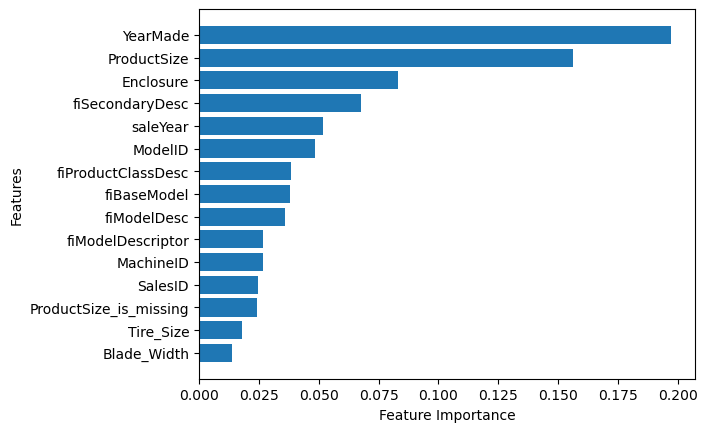

In [92]:
plot_feature_imp(X_train.columns, rs_model.best_estimator_.feature_importances_)